# WeatherPy
----

### Analysis
* Data shows a larger sample of cities above the equator eventhough the coordinates were random.
* The closer the city is to the equator, the higher max temperature. The further away from the equator, the lower the max temperature.
* There is no strong relationship between latitude and humidity. There are numerous cities with 100% humidity throughout the range of latitudes.
* There is no strong relationship between latitude and cloudiness.
* There is no strong relationship between latitude and wind speed but the higher wind speeds appear towards the furthest points away from the equator.

---

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a DataFrame to lat, lon 
column_names = ["City", "Country"]
cities_df = pd.DataFrame(columns = column_names)

## Generate Cities List

In [59]:
# Randomly generate a list of 2000 cities
for x in range(2000):
    lat, lng = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat, lng)
    cities_df = cities_df.append({"City": city.city_name,"Country": city.country_code,}, ignore_index=True)

# Remove duplicate cities
cities_df = cities_df.drop_duplicates(subset='City').reset_index()
cities_df.count()

index      736
City       736
Country    736
dtype: int64

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [60]:
#Create a DataFrame to add all the data from the API calls.
column_names = ["City", "Country","Max Temp",
                "Latitude","Longitude","Humidity",
                "Cloudiness", "Wind Speed"]
clean_cities_df = pd.DataFrame(columns=column_names)

# Loop through the list of cities and add the data to the DataFrame.
url = "http://api.openweathermap.org/data/2.5/weather?"

row_count = 1

print("Beginning Data Retrieval")
for index, row in cities_df.iterrows():
    target_city = row["City"]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("City not found. Skipping...")

    else:
        clean_cities_df.set_value(index, "City", city_data["name"])
        clean_cities_df.set_value(index, "Country", city_data["sys"]["country"])
        clean_cities_df.set_value(index, "Max Temp", city_data["main"]["temp_max"])
        clean_cities_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        clean_cities_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        clean_cities_df.set_value(index, "Humidity", city_data["main"]["humidity"])
        clean_cities_df.set_value(index, "Cloudiness", city_data["clouds"]["all"])
        clean_cities_df.set_value(index, "Wind Speed", city_data["wind"]["speed"])
        
        print("------------------------")
        print("Processing Record #" , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(target_url)
        row_count += 1

Beginning Data Retrieval


C:\Users\tomkh\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\tomkh\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\tomkh\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\tomkh\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\tomkh\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future rele

------------------------
Processing Record # 1  |  Umtata ZA
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=umtata
------------------------
Processing Record # 2  |  Ushuaia AR
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=ushuaia
------------------------
Processing Record # 3  |  Kodiak US
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=kodiak
------------------------
Processing Record # 4  |  Smithers CA
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=smithers
------------------------
Processing Record # 5  |  Katsuura JP
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=katsuura
------------------------
Processing Record # 6  |  West Point US
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666

City not found. Skipping...
City not found. Skipping...
------------------------
Processing Record # 49  |  Victor Harbor AU
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=victor+harbor
------------------------
Processing Record # 50  |  Solok ID
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=solok
------------------------
Processing Record # 51  |  Iqaluit CA
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=iqaluit
------------------------
Processing Record # 52  |  Christchurch NZ
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=christchurch
------------------------
Processing Record # 53  |  Chapleau CA
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=chapleau
------------------------
Processing Record # 54  |  Ce

------------------------
Processing Record # 96  |  Barrow AR
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=barrow
------------------------
Processing Record # 97  |  Amapa HN
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=amapa
------------------------
Processing Record # 98  |  El Rosario MX
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=el+rosario
------------------------
Processing Record # 99  |  Tasiilaq GL
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=tasiilaq
------------------------
Processing Record # 100  |  Ribeira Grande PT
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=ribeira+grande
------------------------
Processing Record # 101  |  Oriximina BR
http://api.openweathermap.org/data/2.5/weather?

------------------------
Processing Record # 141  |  Nemuro JP
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=nemuro
------------------------
Processing Record # 142  |  Fort Nelson CA
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=fort+nelson
------------------------
Processing Record # 143  |  Saint-Philippe CA
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=saint-philippe
------------------------
Processing Record # 144  |  Turukhansk RU
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=turukhansk
------------------------
Processing Record # 145  |  Eyl SO
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=eyl
------------------------
Processing Record # 146  |  Paragould US
http://api.openweathermap.org/data/2.5/we

------------------------
Processing Record # 187  |  Geraldton CA
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=geraldton
------------------------
Processing Record # 188  |  Arraial do Cabo BR
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=arraial+do+cabo
------------------------
Processing Record # 189  |  Kununurra AU
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=kununurra
------------------------
Processing Record # 190  |  San Quintin PH
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=san+quintin
------------------------
Processing Record # 191  |  Tarko-Sale RU
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=tarko-sale
------------------------
Processing Record # 192  |  Sangar RU
http://api.openweatherma

------------------------
Processing Record # 233  |  Voh NC
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=voh
------------------------
Processing Record # 234  |  Whitefish US
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=whitefish
------------------------
Processing Record # 235  |  Trelew AR
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=trelew
------------------------
Processing Record # 236  |  Muroto JP
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=muroto
------------------------
Processing Record # 237  |  Constitucion MX
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=constitucion
------------------------
Processing Record # 238  |  Glenwood Springs US
http://api.openweathermap.org/data/2.5/weather?app

------------------------
Processing Record # 279  |  Dinan FR
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=dinan
------------------------
Processing Record # 280  |  Mwense ZM
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=mwense
------------------------
Processing Record # 281  |  Meadow Lake CA
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=meadow+lake
------------------------
Processing Record # 282  |  Baykit RU
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=baykit
------------------------
Processing Record # 283  |  Bangangte CM
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=bangangte
City not found. Skipping...
------------------------
Processing Record # 284  |  Maroua CM
http://api.openweathermap.org/

------------------------
Processing Record # 325  |  Dzaoudzi YT
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=dzaoudzi
------------------------
Processing Record # 326  |  Kielce PL
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=kielce
------------------------
Processing Record # 327  |  Karratha AU
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=karratha
------------------------
Processing Record # 328  |  Churapcha RU
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=churapcha
------------------------
Processing Record # 329  |  Salym RU
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=salym
------------------------
Processing Record # 330  |  Dingle PH
http://api.openweathermap.org/data/2.5/weather?appid=acf85ec

------------------------
Processing Record # 371  |  Kashima JP
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=kashima
------------------------
Processing Record # 372  |  Guerrero Negro MX
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=guerrero+negro
------------------------
Processing Record # 373  |  Collie AU
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=collie
------------------------
Processing Record # 374  |  Ardakan IR
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=ardakan
------------------------
Processing Record # 375  |  Moose Factory CA
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=moose+factory
------------------------
Processing Record # 376  |  Igrim RU
http://api.openweathermap.org/data/2.5/

------------------------
Processing Record # 418  |  Bani PH
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=bani
------------------------
Processing Record # 419  |  Inongo CD
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=inongo
------------------------
Processing Record # 420  |  San Patricio PY
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=san+patricio
------------------------
Processing Record # 421  |  Havelock US
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=havelock
City not found. Skipping...
------------------------
Processing Record # 422  |  Portland US
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=portland
------------------------
Processing Record # 423  |  Show Low US
http://api.openweathermap.

------------------------
Processing Record # 464  |  Surin TH
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=surin
------------------------
Processing Record # 465  |  Taguatinga BR
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=taguatinga
------------------------
Processing Record # 466  |  Kiama AU
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=kiama
------------------------
Processing Record # 467  |  Mount Pleasant US
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=mount+pleasant
------------------------
Processing Record # 468  |  Isangel VU
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=isangel
------------------------
Processing Record # 469  |  Pangnirtung CA
http://api.openweathermap.org/data/2.5/weathe

------------------------
Processing Record # 510  |  Atasu KZ
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=atasu
------------------------
Processing Record # 511  |  Saint-Pierre FR
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=saint-pierre
------------------------
Processing Record # 512  |  Jinchang CN
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=jinchang
------------------------
Processing Record # 513  |  Sakaiminato JP
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=sakaiminato
------------------------
Processing Record # 514  |  Kirakira SB
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=kirakira
------------------------
Processing Record # 515  |  Karak JO
http://api.openweathermap.org/data/2.5/weathe

------------------------
Processing Record # 557  |  Totma RU
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=totma
------------------------
Processing Record # 558  |  Shadrinsk RU
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=shadrinsk
------------------------
Processing Record # 559  |  Pinas FR
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=pinas
City not found. Skipping...
------------------------
Processing Record # 560  |  Iguape BR
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=iguape
------------------------
Processing Record # 561  |  Banjar ID
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=banjar
------------------------
Processing Record # 562  |  Broome GB
http://api.openweathermap.org/data/2.5/wea

------------------------
Processing Record # 602  |  Vancouver US
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=vancouver
------------------------
Processing Record # 603  |  Santa Flavia CL
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=santa+flavia
City not found. Skipping...
------------------------
Processing Record # 604  |  At-Bashi KG
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=at-bashi
------------------------
Processing Record # 605  |  Amursk RU
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=amursk
------------------------
Processing Record # 606  |  Campoverde IT
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=campoverde
------------------------
Processing Record # 607  |  Sao Joao da Barra BR
htt

------------------------
Processing Record # 649  |  San Ramon NI
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=san+ramon
------------------------
Processing Record # 650  |  Mackenzie CA
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=mackenzie
------------------------
Processing Record # 651  |  Kautokeino NO
http://api.openweathermap.org/data/2.5/weather?appid=acf85ecc5d5691666e5082c63b5fb966&units=IMPERIAL&q=kautokeino


In [61]:
# Get count of all data
clean_cities_df.count()

City          651
Country       651
Max Temp      651
Latitude      651
Longitude     651
Humidity      651
Cloudiness    651
Wind Speed    651
dtype: int64

In [62]:
#Reset the index
clean_cities_df = clean_cities_df.reset_index()
del clean_cities_df['index']
clean_cities_df.head()

,City,Country,Max Temp,Latitude,Longitude,Humidity,Cloudiness,Wind Speed
0,Umtata,ZA,68,-31.59,28.78,82,75,10.29
1,Ushuaia,AR,44.6,-54.81,-68.31,81,40,20.8
2,Kodiak,US,23,39.95,-94.76,34,1,23.04
3,Smithers,CA,-2.21,54.78,-127.17,84,5,2.24
4,Katsuura,JP,39.2,33.93,134.5,80,20,5.82


In [63]:
# Save data to a CSV file
clean_cities_df.to_csv("../starter_code/Analysis/city_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

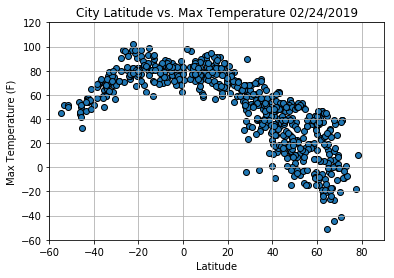

In [64]:
# Create scatterplot for latitude vs Max Temp

plt.scatter(clean_cities_df["Latitude"], clean_cities_df["Max Temp"], 
            marker = "o", edgecolors = "black")
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-60, 90)
plt.ylim(-60, 120)
plt.grid(True)

# Save figure
plt.savefig("../starter_code/Analysis/Latitude_Temperature.png")

#### Latitude vs. Humidity Plot

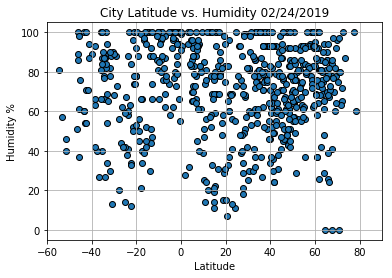

In [65]:
# Create scatterplot for latitude vs Humidity

plt.scatter(clean_cities_df["Latitude"], clean_cities_df["Humidity"], 
            marker = "o", edgecolors = "black")
plt.title(f"City Latitude vs. Humidity {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.xlim(-60, 90)
plt.ylim(-5, 105)
plt.grid(True)

# Save figure
plt.savefig("../starter_code/Analysis/Latitude_Humidity.png")

#### Latitude vs. Cloudiness Plot

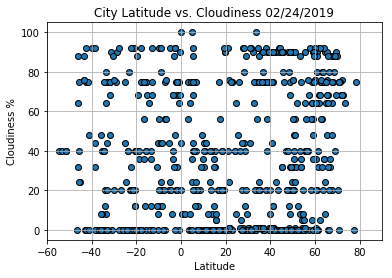

In [66]:
# Create scatterplot for latitude vs cloudiness

plt.scatter(clean_cities_df["Latitude"], clean_cities_df["Cloudiness"], 
            marker = "o", edgecolors = "black")
plt.title(f"City Latitude vs. Cloudiness {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.xlim(-60, 90)
plt.ylim(-5, 105)
plt.grid(True)

# Save figure
plt.savefig("../starter_code/Analysis/Latitude_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

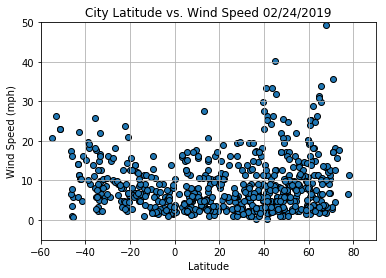

In [67]:
# Create scatterplot for latitude vs wind speed

plt.scatter(clean_cities_df["Latitude"], clean_cities_df["Wind Speed"], 
            marker = "o", edgecolors = "black")
plt.title(f"City Latitude vs. Wind Speed {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-60, 90)
plt.ylim(-5, 50)
plt.grid(True)

# Save figure
plt.savefig("../starter_code/Analysis/Latitude_Wind.png")